### 리뷰 데이터 불러오기

In [1]:
file = open("./data/102301.txt", "r", encoding="utf-8")
data = file.read().split("\n")
file.close()

### 리뷰 데이터 토큰화
- ```konlpy```의 ```morphs()``` 함수를 활용해 토큰화
- 모든 토큰을 하나의 리스트 내에 저장(for문 활용)

In [2]:
from konlpy.tag import Twitter
t = Twitter()
data_tokenized = []

for sentence in data:
    data_tokenized += t.morphs(sentence)

print(len(data_tokenized))    
print(data_tokenized[:10])

10245
['성인', '용', '코믹', '한', 'SF', '액션', '영화', '최악', '의', '영화']


In [4]:
from collections import Counter

cnt = Counter(data_tokenized)
cnt.most_common()[:20]

[('.', 243),
 ('영화', 232),
 ('이', 184),
 ('다', 181),
 ('가', 128),
 ('도', 123),
 ('은', 120),
 ('을', 117),
 ('고', 109),
 ('는', 106),
 ('에', 104),
 ('데드풀', 98),
 ('1', 95),
 ('를', 75),
 ('편', 73),
 ('의', 71),
 ('들', 71),
 ('음', 67),
 ('한', 65),
 (',', 65)]

### 의미 없는 글자 제거 작업
- . 제거
- 1글자
- 특정 문자로 시작하는 글자

In [5]:
from konlpy.tag import Twitter
t = Twitter()
data_tokenized = []

for sentence in data:
    for token in t.morphs(sentence):
        if len(token) > 1:
#         if token != ".":
#         if not token.startswith("중"):
            data_tokenized.append(token)

print(len(data_tokenized))    
print(data_tokenized[:10])

5659
['성인', '코믹', 'SF', '액션', '영화', '최악', '영화', '..', '그냥', '이고']


In [6]:
from collections import Counter

cnt = Counter(data_tokenized)
cnt.most_common()[:20]

[('영화', 232),
 ('데드풀', 98),
 ('보다', 60),
 ('..', 57),
 ('너무', 55),
 ('액션', 48),
 ('...', 48),
 ('쿠키', 41),
 ('영상', 40),
 ('유머', 37),
 ('하고', 36),
 ('ㅋㅋ', 34),
 ('재미', 33),
 ('미국', 33),
 ('는데', 32),
 ('으로', 32),
 ('잔인', 31),
 ('사람', 30),
 ('!!', 30),
 ('보고', 30)]

### nltk를 활용한 텍스트 탐색
- ```nltk``` 모듈의 ```Text()```를 활용해 텍스트를 탐색

In [7]:
from nltk import Text

text = Text(data_tokenized)

In [8]:
## 텍스트의 토큰 추출하기(결과: 리스트)
all_tokens = text.tokens                # 모든 토큰
unique_tokens = set(all_tokens)         # 유니크한 토큰

print("모든 토큰의 개수: ", len(all_tokens))
print("유니크한 토큰의 개수: ", len(unique_tokens))

모든 토큰의 개수:  5659
유니크한 토큰의 개수:  1997


[('영화', 232), ('데드풀', 98), ('보다', 60), ('..', 57), ('너무', 55), ('액션', 48), ('...', 48), ('쿠키', 41), ('영상', 40), ('유머', 37), ('하고', 36), ('ㅋㅋ', 34), ('재미', 33), ('미국', 33), ('는데', 32), ('으로', 32), ('잔인', 31), ('사람', 30), ('!!', 30), ('보고', 30), ('진짜', 30), ('어요', 29), ('습니다', 28), ('마블', 28), ('기대', 27), ('지만', 26), ('그냥', 25), ('재미없', 24), ('보는', 23), ('시간', 22)]


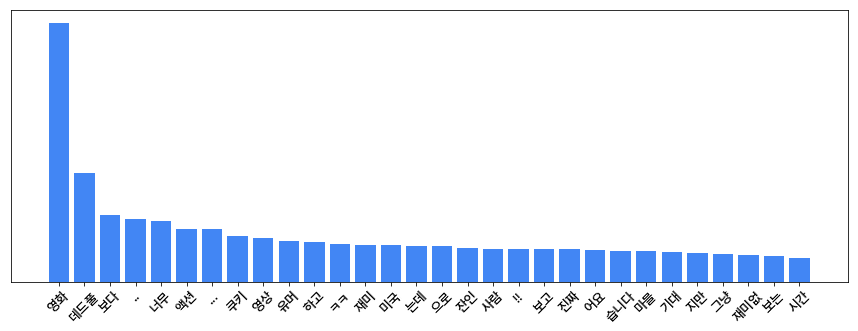

In [11]:
## 각 토큰의 출현 횟수 시각화
# 폰트와 figure 및 label의 size 세팅
from matplotlib import font_manager, rc

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import numpy as np

common_tks = cnt.most_common(30) # 
print(common_tks)

path = '/Users/mac/Downloads/NotoSansCJKkr-hinted/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size= 15)
fig, ax = plt.subplots(figsize=(15, 5))

tokens, freqs = [x[0] for x in common_tks], [x[1] for x in common_tks]
plt.bar(np.arange(len(tokens)), freqs, color = '#4286f4')
plt.xticks(np.arange(len(tokens)), tokens, fontproperties = fontprop, rotation=45, fontsize=13)
plt.yticks([])
plt.show()

### 유사단어 추출

In [17]:
## 유사한 단어
text.similar("영화")
text.similar("데드풀")
# text.similar("현실")

재미없 데드풀 사람 이해 려는 미국 왠만하 느낌 에서 불사신 라지
재미없 영화 ㅎㅎㅎ 인데 라는


### 연어 추출

In [21]:
# import nltk
# !pip3 show nltk

# ## 필요없는 ., ','를 없애는 것
# nltk.download("stopwords")

In [20]:
# ## 연어(collocations)
# text.collocations()

### 태그 추출
- 워드클라우드에 들어갈 데이터를 처리하기 위해 태그를 추출하고 그 사이즈와 색을 설정하기 위한 함수를 정의
- 텍스트를 토큰화한 후 명사(noun)만 추출
- 각 명사의 발생 빈도에 따라 태그의 크기(size)를 설정
- 워드 클라우드에 들어갈 각 태그의 색(color)은 랜덤하게 설정

In [22]:
import random
from konlpy.tag import Twitter
from collections import Counter

In [23]:
def get_tags(text, ntags = 100, multiplier = 1):
    t = Twitter()
    nouns = []
    for sentence in text:
        for noun in t.nouns(sentence):
            nouns.append(noun)
    
    result = []
    count = Counter(nouns) ## counter
    colors = [(241, 237, 13), (240, 51, 13), (13, 65, 239)]
    
    for n, c in count.most_common(ntags):
        temp = {
#                 "color": (random.randint(0,255),random.randint(0,255),random.randint(0,255)), ## RGB
#                 "color": (0, 0, 0, random.randint(0,255)), ### 워드클라우드의 모든 글자 색상을 검정색으로
                "color": colors[np.random.choice(np.arange(len(colors)))],         ### 특정 색상 내에서 선택
                "tag": n, ## token
                "size": c * multiplier} ## count_size
        result.append(temp)
            
    return result

In [24]:
# get_tags() 함수로 태그 가져오기
tags = get_tags(data)
print(tags[0])
print(tags[1])
print(tags[2])

{'color': (240, 51, 13), 'tag': '영화', 'size': 232}
{'color': (13, 65, 239), 'tag': '데드풀', 'size': 98}
{'color': (240, 51, 13), 'tag': '편', 'size': 73}


### 워드클라우드 그리기

In [26]:
import pytagcloud, webbrowser

def draw_cloud(tags, fname, fontname = "Noto Sans CJK", size = (1000, 600)):
    pytagcloud.create_tag_image(tags, fname, fontname = fontname, size = size)
    webbrowser.open(fname)

In [27]:
# 워드클라우드 그리고 파일 저장하기
draw_cloud(tags, ' wordcloud.png')

### 형용사(혹은 형용사와 명사)만 뽑아서 워드 클라우드 만들기

In [29]:
for sentence in text:
    for adj in t.pos(sentence):
        print(adj)

('성인', 'Noun')
('코믹', 'Noun')
('SF', 'Alpha')
('액션', 'Noun')
('영화', 'Noun')
('최악', 'Noun')
('영화', 'Noun')
('..', 'Punctuation')
('그냥', 'Noun')
('이고', 'Josa')
('잔인', 'Noun')
('하며', 'Verb')
('재미없', 'Adjective')
('영화', 'Noun')
('원하시', 'Verb')
('강추', 'Noun')
('니다', 'Eomi')
('가본', 'Verb')
('영화', 'Noun')
('최악', 'Noun')
('아니', 'Adjective')
('지만', 'Josa')
('평점', 'Noun')
('주는', 'Verb')
('손가락', 'Noun')
('부끄러운', 'Adjective')
('영화', 'Noun')
('영화', 'Noun')
('보는', 'Verb')
('내내', 'Noun')
('내용', 'Noun')
('모르', 'Verb')
('답답하고', 'Adjective')
('졸리', 'Noun')
(',....', 'Punctuation')
('다음', 'Noun')
('평점', 'Noun')
('낮네', 'Adjective')
('잔인', 'Noun')
('하고', 'Verb')
('말장난', 'Noun')
('아는', 'Verb')
('사실', 'Noun')
('영화', 'Noun')
('나름', 'Noun')
('재밌었', 'Adjective')
('다만', 'Noun')
('데드풀', 'Noun')
('보거', 'Verb')
('레이', 'Noun')
('놀즈', 'Noun')
('그린랜턴', 'Noun')
('대본', 'Noun')
('있는', 'Adjective')
('아야', 'Noun')
('웃김', 'Verb')
('오프닝', 'Noun')
('노래', 'Noun')
('부터', 'Noun')
('중반', 'Noun')
('까지는', 'Josa')
('DC', 'Alpha')
('

('갯수', 'Noun')
('때문', 'Noun')
('같은', 'Adjective')
('상영', 'Noun')
('있던', 'Adjective')
('사람', 'Noun')
('대부분', 'Noun')
('낚였어', 'Noun')
('킹스', 'Noun')
('같은', 'Adjective')
('방식', 'Noun')
('으로', 'Josa')
('망가진', 'Verb')
('속편', 'Noun')
('앞옆뒤', 'Noun')
('사람', 'Noun')
('웃더', 'Verb')
('ㅋㅋㅋ', 'KoreanParticle')
('분명', 'Noun')
('자극', 'Noun')
('이고', 'Josa')
('잔인', 'Noun')
('보는', 'Verb')
('사람', 'Noun')
('극혐', 'Noun')
('이라', 'Verb')
('지만', 'Josa')
('재밌게', 'Adjective')
('보았', 'Verb')
('사람', 'Noun')
('10', 'Number')
('생각한', 'Verb')
('ㅋㅋㅋㅋㅋㅋ', 'KoreanParticle')
('근데', 'Adverb')
('잔인', 'Noun')
('보는', 'Verb')
('여자', 'Noun')
('비추', 'Verb')
('..', 'Punctuation')
('동생', 'Noun')
('재밌다', 'Adjective')
('하길', 'Verb')
('는데', 'Eomi')
('유머', 'Noun')
('이해하지', 'Verb')
('해서', 'Verb')
('인지', 'Noun')
('시간', 'Noun')
('아까웠', 'Adjective')
('원보', 'Noun')
('중간', 'Noun')
('중간', 'Noun')
('영화', 'Noun')
('패러디', 'Noun')
('투명인간', 'Noun')
('ㅋㅋ', 'KoreanParticle')
('액션', 'Noun')
('신은', 'Verb')
('충분하다', 'Adjective')
('나가', 'Verb')
('소닉

('시도', 'Noun')
('없이', 'Adverb')
('거리', 'Noun')
('영화', 'Noun')
('가만히', 'Adverb')
('두었', 'Verb')
('으면', 'Eomi')
('까지', 'Noun')
('보고', 'Noun')
('나올', 'Verb')
('려고', 'Noun')
('는데', 'Eomi')
('아부', 'Noun')
('다음', 'Noun')
('으로', 'Josa')
('극장', 'Noun')
('20', 'Number')
('분만', 'Noun')
('나옴', 'Verb')
('어찌', 'Noun')
('설명할', 'Verb')
('없지', 'Adjective')
('...', 'Punctuation')
('식상하고', 'Adjective')
('너무', 'Noun')
('재미없', 'Adjective')
('..', 'Punctuation')
('보다', 'Verb')
('나왔', 'Verb')
('..', 'Punctuation')
('ㅠㅠ', 'KoreanParticle')
('대놓고', 'Adverb')
('병맛', 'Noun')
('영화', 'Noun')
('액션', 'Noun')
('통쾌', 'Noun')
('괜춘', 'Noun')
('마블', 'Noun')
('19', 'Number')
('버전', 'Noun')
('19', 'Number')
('가족영화', 'Noun')
('다행', 'Noun')
('번역', 'Noun')
('잘했', 'Verb')
('적절한', 'Adjective')
('병맛', 'Noun')
('괜찮', 'Adjective')
('대사', 'Noun')
('유치', 'Noun')
('찬란', 'Noun')
('하고', 'Verb')
('리얼리티', 'Noun')
('부족하거', 'Adjective')
('일부러', 'Noun')
('트리', 'Noun')
('그러나', 'Conjunction')
('재미', 'Noun')
('있는', 'Adjective')
('영화', 'Noun')

('즐겁', 'Adjective')
('있는', 'Adjective')
('영화', 'Noun')
('극장', 'Noun')
('에서', 'Noun')
('이다', 'Josa')
('ㅠㅠ', 'KoreanParticle')
('처음', 'Noun')
('부터', 'Noun')
('까지', 'Noun')
('보는', 'Verb')
('내내', 'Noun')
('유쾌', 'Noun')
('기존', 'Noun')
('히어로', 'Noun')
('달라', 'Noun')
('재밌었', 'Adjective')
('신선하게', 'Adjective')
('즐길', 'Verb')
('현실', 'Noun')
('그래서', 'Adverb')
('유쾌하', 'Noun')
('즐길', 'Verb')
('있는', 'Adjective')
('영화', 'Noun')
('재밌는', 'Adjective')
('드풀', 'Noun')
('사람', 'Noun')
('정말', 'Noun')
('재밌게', 'Adjective')
('평점', 'Noun')
('알바인', 'Noun')
('같으', 'Adjective')
('네요', 'Eomi')
('......', 'Punctuation')
('내용', 'Noun')
('없고', 'Adjective')
('줄거리', 'Noun')
('없고', 'Adjective')
('....', 'Punctuation')
('흔히', 'Adjective')
('말하는', 'Verb')
('헐리웃', 'Noun')
('기레기', 'Noun')
('영화', 'Noun')
('같은', 'Adjective')
('....', 'Punctuation')
('하도', 'Verb')
('재미없', 'Adjective')
('어서', 'Noun')
('중간', 'Noun')
('그냥', 'Noun')
('나왔', 'Verb')
('습니다', 'Eomi')
('비싼', 'Adjective')
('영화', 'Noun')
('낭비', 'Noun')
('하지', 'Verb')
('마세

('잔인함', 'Noun')
('이해하기', 'Verb')
('어려운', 'Adjective')
('미국', 'Noun')
('농담', 'Noun')
('^^', 'Punctuation')
('별로', 'Noun')
('...', 'Punctuation')
('후회', 'Noun')
('....', 'Punctuation')
('차라리', 'Noun')
('한국영', 'Noun')
('강추', 'Noun')
('인피니티', 'Noun')
('별로', 'Noun')
('...', 'Punctuation')
('ㅠㅠ', 'KoreanParticle')
('잔인', 'Noun')
('...', 'Punctuation')
('지루', 'Noun')
('억지', 'Noun')
('농담', 'Noun')
('....', 'Punctuation')
('말할', 'Verb')
('....', 'Punctuation')
('랑은', 'Josa')
('맞는', 'Verb')
('영화', 'Noun')
('근데', 'Adverb')
('인기', 'Noun')
('있다', 'Adjective')
('..', 'Punctuation')
('희한', 'Noun')
('.....', 'Punctuation')
('역시', 'Noun')
('네요', 'Eomi')
('인피니티', 'Noun')
('화려하지', 'Adjective')
('지루한', 'Adjective')
('있었', 'Adjective')
('는데', 'Eomi')
('간만', 'Noun')
('웃으', 'Verb')
('면서', 'Noun')
('네요', 'Eomi')
('그냥', 'Noun')
('소소한', 'Adjective')
('웃음', 'Noun')
('재미', 'Noun')
('주는', 'Verb')
('정도', 'Noun')
('만족', 'Noun')
('인피니티', 'Noun')
('보다', 'Verb')
('더줌', 'Noun')
('레이', 'Noun')
('놀즈', 'Noun')
('연기', 'Noun

('유쾌', 'Noun')
('하고', 'Verb')
('재밌었', 'Adjective')
('어요', 'Noun')
('즐기', 'Verb')
('면서', 'Noun')
('보기', 'Noun')
('19', 'Number')
('코믹', 'Noun')
('히어로', 'Noun')
('미노', 'Noun')
('진짜', 'Noun')
('시강', 'Noun')
('ㄷㄷ', 'KoreanParticle')
('같은', 'Adjective')
('여자', 'Noun')
('멋있어', 'Adjective')
('데드풀', 'Noun')
('개그', 'Noun')
('감은', 'Verb')
('역시', 'Noun')
('ㅎㅎ', 'KoreanParticle')
('액션', 'Noun')
('신들', 'Noun')
('화끈', 'Noun')
('ㅎㅎㅎ', 'KoreanParticle')
('아니', 'Adjective')
('무슨', 'Noun')
('쿠키', 'Noun')
('영상', 'Noun')
('까지', 'Noun')
('깨알', 'Noun')
('진짜', 'Noun')
('인생', 'Noun')
('영화', 'Noun')
('기다리', 'Verb')
('기대했', 'Adjective')
('보람', 'Noun')
('재미있게', 'Adjective')
('보았', 'Verb')
('습니다', 'Eomi')
('생각', 'Noun')
('보다', 'Verb')
('재밌어', 'Adjective')
('한번', 'Noun')
('보고', 'Noun')
('네요', 'Eomi')
('유쾌', 'Noun')
('입담', 'Noun')
('시원한', 'Adjective')
('액션', 'Noun')
('ㅋㅋ', 'KoreanParticle')
('너무', 'Noun')
('이거지', 'Adverb')
('제대로', 'Noun')
('오락', 'Noun')
('무비', 'Noun')
('충분히', 'Adjective')
('재밋', 'Noun')
('액션', 'Nou

('재미있다', 'Adjective')
('이렇게', 'Adverb')
('지루할', 'Adjective')
('..', 'Punctuation')
('역시', 'Noun')
('영화', 'Noun')
('최고봉', 'Noun')
('인데', 'Josa')
('기대', 'Noun')
('너무', 'Noun')
('는지', 'Eomi')
('보단', 'Josa')
('같지', 'Adjective')
('그래도', 'Adverb')
('습니다', 'Eomi')
('병맛', 'Noun')
('영화', 'Noun')
('기대', 'Noun')
('하는', 'Verb')
('사람', 'Noun')
('부터', 'Noun')
('습니다', 'Eomi')
('데드풀', 'Noun')
('라면', 'Noun')
('충분히', 'Adjective')
('재미있고', 'Adjective')
('원래', 'Noun')
('보다', 'Verb')
('나은', 'Noun')
('찾기', 'Noun')
('힘들', 'Adjective')
('듯이', 'Noun')
('그러나', 'Conjunction')
('충분한', 'Adjective')
('),', 'Punctuation')
('번역', 'Noun')
('또한', 'Noun')
('인생', 'Noun')
('번역하신', 'Verb')
('하고', 'Verb')
('미국', 'Noun')
('유머', 'Noun')
('그리고', 'Conjunction')
('미국', 'Noun')
('문화', 'Noun')
('어느', 'Adverb')
('정도', 'Noun')
('이해하는', 'Verb')
('라면', 'Noun')
('재미', 'Noun')
('같네', 'Adjective')
('미국', 'Noun')
('미국', 'Noun')
('유머', 'Noun')
('이해되', 'Verb')
('지만', 'Josa')
('넘어서진', 'Verb')
('번역', 'Noun')
('99', 'Number')
('점준', 'Noun')
('

('멍청이', 'Noun')
('많네', 'Adjective')
('이영화', 'Noun')
('자체', 'Noun')
('19', 'Number')
('금달', 'Noun')
('나온', 'Verb')
('영화', 'Noun')
('별점', 'Noun')
('너무', 'Noun')
('낮게', 'Adjective')
('주는', 'Verb')
('아니냐', 'Adjective')
('물론', 'Noun')
('미국', 'Noun')
('유머', 'Noun')
('있는', 'Adjective')
('별점', 'Noun')
('너무', 'Noun')
('심하다', 'Adjective')
('ㅉㅉ', 'KoreanParticle')
('영화', 'Noun')
('자체', 'Noun')
('그래도', 'Adverb')
('중간', 'Noun')
('이상은', 'Noun')
('가는', 'Verb')
('쿠키', 'Noun')
('영상', 'Noun')
('재미있', 'Adjective')
('여러', 'Noun')
('드립', 'Noun')
('유머', 'Noun')
('이해하기', 'Verb')
('위해서', 'Verb')
('많은', 'Adjective')
('배경', 'Noun')
('지식', 'Noun')
('미국', 'Noun')
('문화', 'Noun')
('대한', 'Noun')
('이해', 'Noun')
('필요합', 'Adjective')
('니다', 'Eomi')
('재미없', 'Adjective')
('어요', 'Noun')
('평점', 'Noun')
('알바', 'Noun')
('진짜', 'Noun')
('있다', 'Adjective')
('는걸', 'Noun')
('새삼', 'Noun')
('느낌', 'Noun')
('웃음', 'Noun')
('코드', 'Noun')
('너무', 'Noun')
('틀림', 'Noun')
('액션', 'Noun')
('그렇', 'Adjective')
('암튼', 'Adverb')
('병맛', 'Noun')
('

In [30]:
def get_tags(text, ntags = 100, multiplier = 1):
    to_excluide = ["영화", "연기"]
    t = Twitter()
    tokens = []
    nouns, adjs = set(), set() # unique한 요소들을 담기 위해서
    
    for sentence in text:
        for token, tag in t.pos(sentence):
            if token in to_excluide:
                pass
            elif tag == "Noun":
                tokens.append(token)
                nouns.add(token)
#                 if token != "영화":
#                     tokens.append(token)
#                     nouns.add(token)
            elif tag == "Adjective":
                tokens.append(token)
                adjs.add(token)
    
    result = []
    count = Counter(tokens) ## counter
    
    for t, c in count.most_common(ntags):
        if t in nouns:
            temp = {
                    "color": (173, 13, 35, np.random.rand()), ## RGB 랜덤
                    "tag": t, ## token
                    "size": c * multiplier} ## count_size
        elif t in adjs:
            temp = {
                "color": (1, 173, 136, np.random.rand()),
                "tag": t,
                "size": c * multiplier}
        result.append(temp)
            
    return result

In [31]:
# get_tags() 함수로 태그 가져오기
tags = get_tags(data, 200, 1)
print(tags)

[{'color': (173, 13, 35, 0.1647110518845727), 'tag': '데드풀', 'size': 98}, {'color': (173, 13, 35, 0.09718448190798246), 'tag': '편', 'size': 73}, {'color': (173, 13, 35, 0.8127518931792453), 'tag': '너무', 'size': 55}, {'color': (173, 13, 35, 0.2628145162144663), 'tag': '더', 'size': 53}, {'color': (173, 13, 35, 0.011848016578152931), 'tag': '액션', 'size': 48}, {'color': (173, 13, 35, 0.5183219634963344), 'tag': '쿠키', 'size': 41}, {'color': (173, 13, 35, 0.5235045149978347), 'tag': '영상', 'size': 40}, {'color': (173, 13, 35, 0.23959107261334056), 'tag': '유머', 'size': 37}, {'color': (173, 13, 35, 0.5466709756029371), 'tag': '재미', 'size': 33}, {'color': (173, 13, 35, 0.40037783674264615), 'tag': '미국', 'size': 33}, {'color': (1, 173, 136, 0.9481321970925778), 'tag': '좋', 'size': 33}, {'color': (173, 13, 35, 0.22465376272702575), 'tag': '잔인', 'size': 31}, {'color': (173, 13, 35, 0.2709089537574533), 'tag': '사람', 'size': 30}, {'color': (173, 13, 35, 0.5173474791204031), 'tag': '진짜', 'size': 30}, {

In [32]:
import pytagcloud, webbrowser

def draw_cloud(tags, fname, fontname = "Noto Sans CJK", size = (1000, 600)):
    pytagcloud.create_tag_image(tags, fname, fontname = fontname, size = size)
    webbrowser.open(fname)

In [33]:
# 워드클라우드 그리고 파일 다운받기
draw_cloud(tags, ' wordcloud_2.png')